In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
#nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# text preprocessing
import contractions
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [ ]:
df_train = pd.read_csv('/content/data_train.csv')
df_test = pd.read_csv('/content/data_test.csv')

X_train = df_train.Text
X_test = df_test.Text

y_train = df_train.Emotion
y_test = df_test.Emotion

class_names = ['joy', 'sadness', 'anger', 'neutral', 'fear']
data = pd.concat([df_train, df_test])

print('size of training set: %s' % (len(df_train['Text'])))
print('size of validation set: %s' % (len(df_test['Text'])))
print(data.Emotion.value_counts())

data.head()

size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [ ]:
sentence = df_train.Text[7930]
sentence

'Irina hung up in exasperation . '

## Chuyển từng word trong sentence bằng Lemma

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string


def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
def lemmatizer_token(review):
    review = contractions.fix(review)  
    review = review.lower()
    review = re.sub("(<.*?>)", "", review)
    review = re.sub(r'http\S+', '', review)
    review= re.sub(r"(#[\d\w\.]+)", '', review)
    review= re.sub(r"(@[\d\w\.]+)", '', review)
    review = re.sub("(\\W|\\d)", " ", review)
    review = review.strip()

    review = word_tokenize(review)
    lemmatizer = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    lemma = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in review if word not in string.punctuation if not word in set(all_stopwords)]
    #lemma = ' '.join(lemma)
    #text.append(lemma)

    return lemma

In [ ]:
print(df_test['Text'][46])
print(lemmatizer_token(df_test['Text'][46]))

 I didn't like her butting in where I didn't want her . She's a chatter box . 
['not', 'like', 'butting', 'not', 'want', 'chatter', 'box']


In [ ]:
print(df_train['Text'][0])
print(lemmatizer_token(df_train['Text'][0]))

 There are tons of other paintings that I think are better . 
['ton', 'painting', 'think', 'well']


In [ ]:
words = []
for i in range(len(df_train)):
  words.append(lemmatizer_token(df_train['Text'][i]))

res = []
for i in range(len(words)):
  for j in range(len(words[i])):
    res.append(words[i][j])

In [ ]:
len(res)

59048

## Dùng TFIDF để get feature

In [ ]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=lemmatizer_token, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [ ]:
print(X_train_vect[0])

  (0, 9054)	0.3278213043911544
  (0, 8381)	0.6575329985216148
  (0, 8257)	0.3387951614640059
  (0, 5872)	0.5877085900435982


In [ ]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

# assign documents
d0 = 'red blue green white yellow'
d1 = 'red blue red '
d2 = 'yellow'

# merge documents into a single corpus
string = [d0, d1, d2]

# create object
tfidf = TfidfVectorizer(ngram_range=(1, 2))

# get tf-df values
result = tfidf.fit_transform(string)

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
	print(ele1, ':', ele2)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


idf values:
blue : 1.2876820724517808
blue green : 1.6931471805599454
blue red : 1.6931471805599454
green : 1.6931471805599454
green white : 1.6931471805599454
red : 1.2876820724517808
red blue : 1.2876820724517808
white : 1.6931471805599454
white yellow : 1.6931471805599454
yellow : 1.2876820724517808

Word indexes:
{'red': 5, 'blue': 0, 'green': 3, 'white': 7, 'yellow': 9, 'red blue': 6, 'blue green': 1, 'green white': 4, 'white yellow': 8, 'blue red': 2}

tf-idf value:
  (0, 8)	0.369772375024391
  (0, 4)	0.369772375024391
  (0, 1)	0.369772375024391
  (0, 6)	0.2812214222566028
  (0, 9)	0.2812214222566028
  (0, 7)	0.369772375024391
  (0, 3)	0.369772375024391
  (0, 0)	0.2812214222566028
  (0, 5)	0.2812214222566028
  (1, 2)	0.4729627816159752
  (1, 6)	0.35970038624900014
  (1, 0)	0.35970038624900014
  (1, 5)	0.7194007724980003
  (2, 9)	1.0

tf-idf values in matrix form:
[[0.28122142 0.36977238 0.         0.36977238 0.36977238 0.28122142
  0.28122142 0.36977238 0.36977238 0.28122142]
 [

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Thống kê số liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


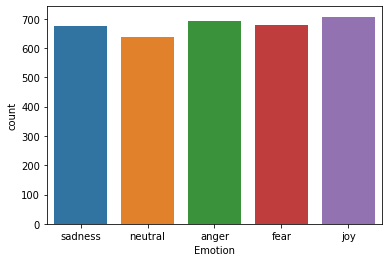

In [ ]:
sns.countplot(df_test['Emotion'])

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def wordCloud(df, emotion):
  text = " ".join(cat for cat in df['Text'][df['Emotion'] == emotion])
  wordcloud = WordCloud(width = 800, height = 400, background_color ='white', min_font_size = 10).generate(text)

  plt.figure(figsize = (6, 4), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

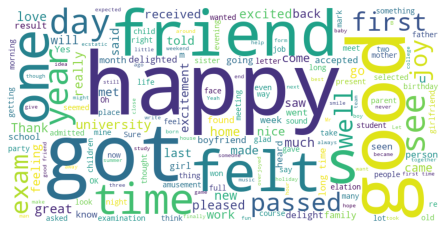

In [ ]:
wordCloud(df_train, class_names[0])

## Các pp Machine Learning

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_vect, y_train)

ysvm_pred = svc.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_vect, y_train)

yrf_pred = dt.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

# Changing the hyperparameter

## SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

start = time.process_time()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['linear', 'poly', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_vect, y_train)
end = time.process_time()

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.547 total time=   6.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.565 total time=   5.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.558 total time=   5.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.581 total time=   8.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.575 total time=   5.8s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.235 total time=   6.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.250 total time=   6.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.241 total time=   6.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.251 total time=   6.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.254 total time=   6.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.338 total time=   7.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

In [ ]:
print('Run time GridSearch: ', start-end)

Run time GridSearch:  -2545.12014004


In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [ ]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test_vect)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

       anger       0.65      0.72      0.69       693
        fear       0.74      0.71      0.73       679
         joy       0.71      0.70      0.70       707
     neutral       0.69      0.70      0.69       638
     sadness       0.74      0.68      0.71       676

    accuracy                           0.70      3393
   macro avg       0.71      0.70      0.70      3393
weighted avg       0.71      0.70      0.70      3393



Accuracy: 70.38%

F1 Score: 70.38

COnfusion Matrix:
 [[501  50  42  54  46]
 [ 70 485  50  27  47]
 [ 54  41 495  81  36]
 [ 53  33  73 447  32]
 [ 87  48  40  41 460]]


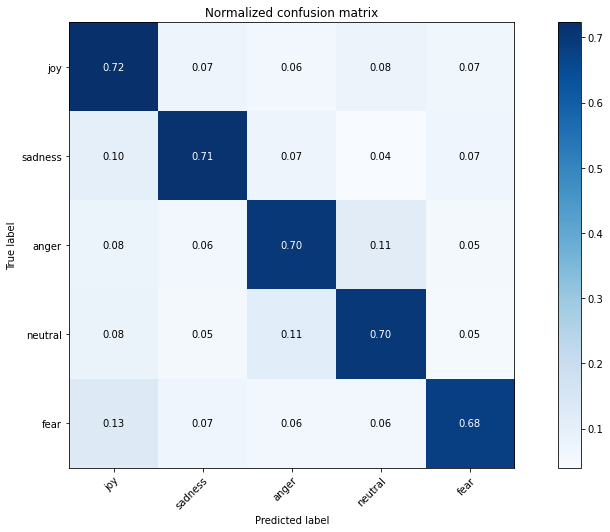

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, grid_predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, grid_predictions, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, grid_predictions))
plot_confusion_matrix(y_test, grid_predictions, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
svc_classifier = SVC(kernel='linear', C=C).fit(X, y)
C = 1.0
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

## Code of plotting
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.set_cmap("gist_rainbow") 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

## Decision Tree

In [ ]:
from matplotlib import Parameter
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

model = DecisionTreeClassifier(random_state=0, max_depth=100)
model.fit(X_train_vect, y_train)

Parameter = 

yrf_pred = model.predict(X_test_vect)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, yrf_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, yrf_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, yrf_pred))

plot_confusion_matrix(y_test, yrf_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

SyntaxError: ignored

##Save model and Demo

In [ ]:
from sklearn.pipeline import Pipeline
import pickle

In [ ]:
#Create pipeline with tf-idf vectorizer and Logistic model
LinearSVC_model = Pipeline([
    ('tfidf', vect),
    ('clf', svc),
])

# save the model
filename = '/content/SVC.sav'
pickle.dump(LinearSVC_model, open(filename, 'wb'))


model = pickle.load(open(filename, 'rb'))
message = 'I saw a ghost last day' 
print(model.predict([message]))